# Sprint03 ロジスティック回帰　スクラッチ

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches
import math

In [4]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    bias : bool
      バイアス項を入れる場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, L2, bias):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.L2 = L2
        self.bias = bias

        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = np.array([])

    def _initial_logistic(self, X):
        if X.ndim != 1 :
            n_features = X.shape[1]
            m_samples  = X.shape[0]
            initial_coef = np.random.normal(0,1,n_features)
            initial_coef = initial_coef.reshape(1,n_features)
        else:
            X = X.reshape(-1,1)
            initial_coef = np.array(range(len(X)))
            initial_coef = initial_coef.reshape((1,-1))
        return initial_coef

    def _logistic_hypothesis(self, X, coef_):
        as_function =1/(1+ math.e**(-np.dot(X, coef_.T)))
        return as_function
    
    def _gradient_descent1(self, X, error):
        coef_temp = self.coef_
        coef_temp[0,0] = 0
#         print(coef_temp)
        self.coef_ = self.coef_ - self.lr/len(X) * ( np.dot(error.T, X) + self.L2 * coef_temp) 
#         print(np.dot(error.T, X))
        return self.coef_

    def _gradient_descent2(self, X, error):
        self.coef_ = self.coef_ - self.lr/len(X) * ( np.dot(error.T, X) + self.L2 * coef_temp) 
        return self.coef_



    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        # yのshapeを＊行1列に固定。
        y = y.reshape(-1,1)
        y_val = y_val.reshape(-1,1)
        
        # bias有の場合は、XとX_val に 左側から１列追加
        if self.bias == True:
            X = np.hstack([np.ones((len(X),1))  ,X])
            X_val = np.hstack([np.ones((len(X_val),1)) ,X_val])
         
        self.coef_ = self._initial_logistic(X)
             
        if self.bias == True:
            for i in range(self.iter) :
                error = self._logistic_hypothesis(X, self.coef_) - y
#               error =  np.dot(X, self.coef_.T) - y
                self.coef_ = self._gradient_descent1(X, error)
                self._loss_function(X, y, i, X_val, y_val)
                
        else:
            for i in range(self.iter) :
                error = self._logistic_hypothesis(X, self.coef_) - y
                self.coef_ = self._gradient_descent2(X, error)
                self._loss_function(X, y, i, X_val, y_val)

    def predict_proba(self, X):
        ### predict,predict_probaについては　bias = True の場合のみ作成。biasなしの場合は省略した。
        X = np.hstack([np.ones((len(X),1))  ,X])
        return 1/(1+ math.e**(-np.dot(X, self.coef_.T)))

    def predict(self, X):
        classify_list = self.predict_proba(X)
        threshold = 0.5
        for i in range(len(X)):
            if classify_list[i,0] > threshold :
                classify_list[i,0] = 1
            else:
                classify_list[i,0] = 0
        return classify_list
    
    def _loss_function(self, X, y, iter_number, X_val, y_val):
        #### self.loss ####
        cross_entropy1 = (np.dot(y.T, np.log(self._logistic_hypothesis(X, self.coef_))) 
                         +np.dot(1-y.T, np.log(1-self._logistic_hypothesis(X,self.coef_)))
                         )
        reg_constrain1 = self.L2 / (2 * len(X)) * np.dot(self.coef_,self.coef_.T)
        loss_f1 = 1/len(X) * (-1) * cross_entropy1 + reg_constrain1
        self.loss[iter_number] = loss_f1
        
        #### self.val_loss ####
        cross_entropy2 = (np.dot(y_val.T, np.log(self._logistic_hypothesis(X_val, self.coef_))) 
                         +np.dot(1-y_val.T, np.log(1-self._logistic_hypothesis(X_val, self.coef_)))
                         )
        reg_constrain2 = self.L2 / (2 * len(X_val)) * np.dot(self.coef_,self.coef_.T)
        loss_f2 = 1/len(X_val) * (-1) * cross_entropy2 + reg_constrain2
        self.val_loss[iter_number] = loss_f2

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris_dataset = load_iris()
#iris_data = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])

In [6]:
iris_target = iris_dataset.target[50:150]
iris_target = iris_target - 1 
iris_data = iris_dataset['data']
iris_data = iris_data[50:150,:]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_target, test_size=0.25, random_state = 1)

clf = ScratchLogisticRegression(10000, 0.001, 0.00002,True)
clf.fit(X_train,y_train,X_test,y_test)
clf.predict(X_test).T
pred = clf.predict(X_test)
clf.predict_proba(X_test)
clf.predict(X_test).T

array([[1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 0.]])

In [8]:
print(y_test)
print(np.sum(pred.T==y_test)/len(y_test))

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0]
0.96


In [9]:
# clf = ScratchLogisticRegression(10000, 0.000005,0.0003, True, True)
# clf.fit(X,y,X_val,y_val)
# print(clf.predict_proba(X))
# clf.predict(X)

In [8]:
# X = np.array([[1,2,3],
#              [4,5,6],
#              [4,5,7],
#              [10,11,12],
#              [13,14,15]])

# y = np.array([0,0,1,1,1])
# X_val = np.array([[4,5,7],
#              [10,11,12]])
# y_val = np.array([0,1,1])

In [10]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)  
# clf.fit(X_train, y_train, X_test, y_test)
# plt.plot(np.array(range(4000)), clf.loss[0:4000], label = "loss_train")
# plt.plot(np.array(range(4000)), clf.val_loss[0:4000], label = "loss_val")
# plt.title("logloss_train & logloss_val")
# plt.legend()
# plt.show()

## 【問題１】仮定関数

## 【問題２】最急降下法

## 【問題３】　推定

## 【問題４】　目的関数（損失関数）

## 【問題5】学習と推定

In [11]:
from sklearn.linear_model import LogisticRegression
clf_sk = LogisticRegression(random_state=1).fit(X_train, y_train)
pred_sk = clf_sk.predict(X_test)
print(np.sum(pred_sk == y_test)/len(y_test))

0.96


C:\Users\hirot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("## Sklearn LogisticRegression ##" )
print("Accuracy:{}".format(accuracy_score(y_test, pred_sk)))
print("precision:{}".format(precision_score(y_test, pred_sk, average=None)))
print("recall:{}".format(recall_score(y_test, pred_sk, average=None)))
print("f1_score:{}\n".format(f1_score(y_test, pred_sk, average=None)))

print("## Sclatch  ##" )
print("Accuracy:{}".format(accuracy_score(y_test, pred)))
print("precision:{}".format(precision_score(y_test, pred, average=None)))
print("recall:{}".format(recall_score(y_test, pred, average=None)))
print("f1_score:{}".format(f1_score(y_test, pred, average=None)))


## Sklearn LogisticRegression ##
Accuracy:0.96
precision:[1.     0.9375]
recall:[0.9 1. ]
f1_score:[0.94736842 0.96774194]

## Sclatch  ##
Accuracy:0.96
precision:[1.     0.9375]
recall:[0.9 1. ]
f1_score:[0.94736842 0.96774194]


##  サンプルを変更してもう一例検証してみる(train_test_splitのrandom_state変更)。

In [13]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(iris_data,iris_target, test_size=0.25, random_state = 5)

clf1 = ScratchLogisticRegression(10000, 0.001, 0.00002,True)
clf1.fit(X1_train,y1_train,X1_test,y1_test)
clf1.predict(X1_test).T
pred1 = clf1.predict(X1_test)
clf1.predict_proba(X1_test)
clf1.predict(X1_test).T

array([[1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 1., 1., 1., 1., 0., 0.]])

In [14]:
print(y1_test)
print(np.sum(pred1.T ==y1_test)/len(y1_test))

[1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0]
0.84


In [15]:
clf_sk1 = LogisticRegression(random_state=1).fit(X1_train, y1_train)
pred_sk1 = clf_sk1.predict(X1_test)
print(np.sum(pred_sk1 == y1_test)/len(y1_test))

0.88


C:\Users\hirot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
print("## Sklearn LogisticRegression ##" )
print("Accuracy:{}".format(accuracy_score(y1_test, pred_sk1)))
print("precision:{}".format(precision_score(y1_test, pred_sk1, average=None)))
print("recall:{}".format(recall_score(y1_test, pred_sk1, average=None)))
print("f1_score:{}\n".format(f1_score(y1_test, pred_sk1, average=None)))

print("## Sclatch  ##" )
print("Accuracy:{}".format(accuracy_score(y1_test, pred1)))
print("precision:{}".format(precision_score(y1_test, pred1, average=None)))
print("recall:{}".format(recall_score(y1_test, pred1, average=None)))
print("f1_score:{}".format(f1_score(y1_test, pred1, average=None)))


## Sklearn LogisticRegression ##
Accuracy:0.88
precision:[1.   0.75]
recall:[0.8125 1.    ]
f1_score:[0.89655172 0.85714286]

## Sclatch  ##
Accuracy:0.84
precision:[1.         0.69230769]
recall:[0.75 1.  ]
f1_score:[0.85714286 0.81818182]


## 【問題６】学習曲線のプロット

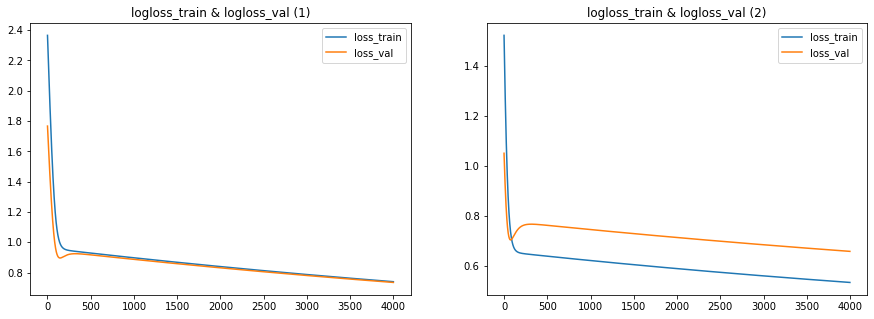

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)  
clf.fit(X_train, y_train, X_test, y_test)
plt.plot(np.array(range(4000)), clf.loss[0:4000], label = "loss_train")
plt.plot(np.array(range(4000)), clf.val_loss[0:4000], label = "loss_val")
plt.title("logloss_train & logloss_val (1)")
plt.legend()

plt.subplot(1,2,2)
clf1.fit(X1_train, y1_train, X1_test, y1_test)
plt.plot(np.array(range(4000)), clf1.loss[0:4000], label = "loss_train")
plt.plot(np.array(range(4000)), clf1.val_loss[0:4000], label = "loss_val")
plt.title("logloss_train & logloss_val (2)")
plt.legend()
plt.show()

## 【問題７】可視化

train_test_splitによる結果を固定。  
固定された訓練データから２列を取り出して、モデリング（scratchLogisticReggressionによるフィッティング）。  
各モデルでの結果を表示。  

In [21]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(iris_data,iris_target, test_size=0.25, random_state = 10)


In [22]:
X3_train = X2_train[:, 0:2]
X3_test = X2_test[:, 0:2]

clf3 = ScratchLogisticRegression(10000, 0.001, 0.00002,True)
clf3.fit(X3_train,y2_train,X3_test,y2_test)

# clf3.predict(X3_test).T
# pred3 = clf3.predict(X3_test)
# pred3 = pred3[:,0]

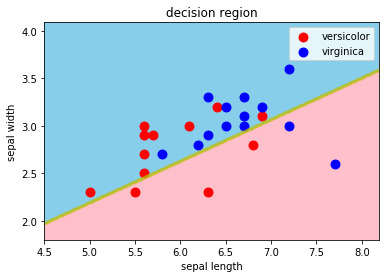

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2    

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# 標準化されたＸテストデータ、学習モデルの推定結果、学習済みモデル（フィッティングされたモデル）を入力する。
decision_region(X3_test, y2_test, clf3, xlabel='sepal length', ylabel='sepal width')

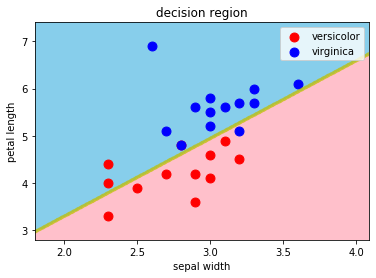

In [25]:
X3_train = X2_train[:, 1:3]
X3_test = X2_test[:, 1:3]

clf3 = ScratchLogisticRegression(10000, 0.001, 0.00002,True)
clf3.fit(X3_train,y2_train,X3_test,y2_test)
clf3.predict(X3_test).T
pred3 = clf3.predict(X3_test)
clf3.predict_proba(X3_test)
clf3.predict(X3_test).T

decision_region(X3_test, y2_test, clf3, xlabel='sepal width', ylabel='petal length')

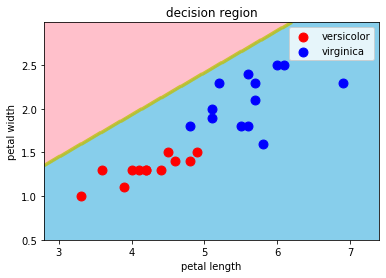

In [26]:

X3_train = X2_train[:, -2:]
X3_test = X2_test[:, -2:]

clf3 = ScratchLogisticRegression(10000, 0.001, 0.00002,True)
clf3.fit(X3_train,y2_train,X3_test,y2_test)
clf3.predict(X3_test).T
pred3 = clf3.predict(X3_test)
clf3.predict_proba(X3_test)
clf3.predict(X3_test).T

decision_region(X3_test, y2_test, clf3, xlabel='petal length', ylabel='petal width')

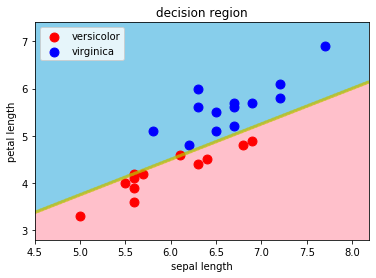

In [27]:

X3_train = X2_train[:, [0,2]]
X3_test = X2_test[:, [0,2]]

clf3 = ScratchLogisticRegression(10000, 0.001, 0.00002,True)
clf3.fit(X3_train,y2_train,X3_test,y2_test)
clf3.predict(X3_test).T
pred3 = clf3.predict(X3_test)
clf3.predict_proba(X3_test)
clf3.predict(X3_test).T

decision_region(X3_test, y2_test, clf3, xlabel='sepal length', ylabel='petal length')

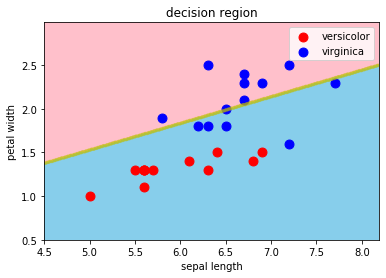

In [28]:

X3_train = X2_train[:, [0,3]]
X3_test = X2_test[:, [0,3]]

clf3 = ScratchLogisticRegression(10000, 0.001, 0.00002,True)
clf3.fit(X3_train,y2_train,X3_test,y2_test)
clf3.predict(X3_test).T
pred3 = clf3.predict(X3_test)
clf3.predict_proba(X3_test)
clf3.predict(X3_test).T

decision_region(X3_test, y2_test, clf3, xlabel='sepal length', ylabel='petal width')

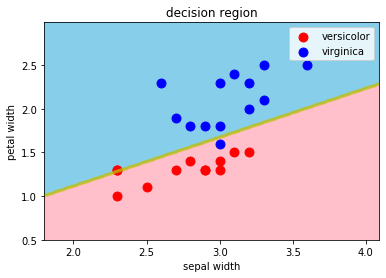

In [29]:

X3_train = X2_train[:, [1,3]]
X3_test = X2_test[:, [1,3]]

clf3 = ScratchLogisticRegression(10000, 0.001, 0.00002,True)
clf3.fit(X3_train,y2_train,X3_test,y2_test)
clf3.predict(X3_test).T
pred3 = clf3.predict(X3_test)
clf3.predict_proba(X3_test)
clf3.predict(X3_test).T

decision_region(X3_test, y2_test, clf3, xlabel='sepal width', ylabel='petal width')

＜結果＞  
'sepal width'と'petal width'  
'sepal length'と'petal length'  
が、ロジスティック回帰により、精度よく分類できている(試行により分類結果が変動する)。  